In [200]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# Yahoo Finance connection
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
from datetime import datetime


In [201]:
from datetime import date, timedelta

# In this test, we'll be using a 2 year (730 days) interval for the stock price prediction

interval = 730
target_interval = (datetime.now() - timedelta(days=interval)).strftime("%Y-%m-%d")

df = pdr.get_data_yahoo('AMZN', start=target_interval, end=datetime.now())

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-19,185.634506,188.107498,183.785995,183.828506,183.828506,98734000
2021-11-22,183.819000,185.673004,178.375000,178.628494,178.628494,96844000
2021-11-23,179.251999,181.052505,176.385498,179.001999,179.001999,73804000
2021-11-24,178.133499,180.682007,176.842499,179.020493,179.020493,46560000
2021-11-26,180.104996,181.675003,175.207504,175.227997,175.227997,59826000
...,...,...,...,...,...,...
2023-11-13,142.080002,143.229996,140.669998,142.589996,142.589996,35680600
2023-11-14,145.000000,147.259995,144.679993,145.800003,145.800003,56674600
2023-11-15,147.059998,147.289993,142.589996,143.199997,143.199997,63875700


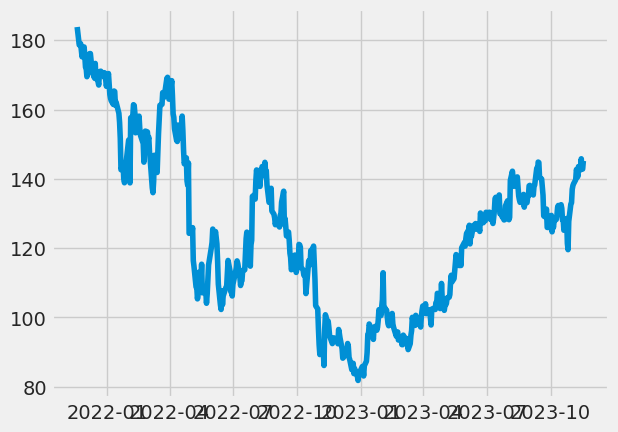

In [202]:
# We'll be using the closing price

plt.plot(df.index, df['Close'])

In [203]:
import numpy as np
import datetime
from datetime import date, timedelta

# We turn the string into datetime as the dataframe use dates as indexes

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

""" With this we'll fetch our X features and y labels, we turn the last 5 days of a target value
    (in our case, the close value) and the actual price as the y label.
    The goal is for the algorithm to use the last 5 days as means to predict the y value.
"""

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)
  print(last_date)
  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]
    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    print(next_date)
    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# The value for first_date_str MUST be AT LEAST n days ahead of the first date in the dataframe.

windowed_df = df_to_windowed_df(df,
                                df.index[5].strftime('%Y-%m-%d'),
                                df.index[-1].strftime('%Y-%m-%d'),
                                n=5)
windowed_df

2023-11-17 00:00:00
2021-11-30 00:00:00
2021-12-01 00:00:00
2021-12-02 00:00:00
2021-12-03 00:00:00
2021-12-06 00:00:00
2021-12-07 00:00:00
2021-12-08 00:00:00
2021-12-09 00:00:00
2021-12-10 00:00:00
2021-12-13 00:00:00
2021-12-14 00:00:00
2021-12-15 00:00:00
2021-12-16 00:00:00
2021-12-17 00:00:00
2021-12-20 00:00:00
2021-12-21 00:00:00
2021-12-22 00:00:00
2021-12-23 00:00:00
2021-12-27 00:00:00
2021-12-28 00:00:00
2021-12-29 00:00:00
2021-12-30 00:00:00
2021-12-31 00:00:00
2022-01-03 00:00:00
2022-01-04 00:00:00
2022-01-05 00:00:00
2022-01-06 00:00:00
2022-01-07 00:00:00
2022-01-10 00:00:00
2022-01-11 00:00:00
2022-01-12 00:00:00
2022-01-13 00:00:00
2022-01-14 00:00:00
2022-01-18 00:00:00
2022-01-19 00:00:00
2022-01-20 00:00:00
2022-01-21 00:00:00
2022-01-24 00:00:00
2022-01-25 00:00:00
2022-01-26 00:00:00
2022-01-27 00:00:00
2022-01-28 00:00:00
2022-01-31 00:00:00
2022-02-01 00:00:00
2022-02-02 00:00:00
2022-02-03 00:00:00
2022-02-04 00:00:00
2022-02-07 00:00:00
2022-02-08 00:00:00


,Target Date,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2021-11-29,183.828506,178.628494,179.001999,179.020493,175.227997,178.078506
1,2021-11-30,178.628494,179.001999,179.020493,175.227997,178.078506,175.353500
2,2021-12-01,179.001999,179.020493,175.227997,178.078506,175.353500,172.186005
3,2021-12-02,179.020493,175.227997,178.078506,175.353500,172.186005,171.867996
4,2021-12-03,175.227997,178.078506,175.353500,172.186005,171.867996,169.489502
...,...,...,...,...,...,...,...
492,2023-11-13,139.740005,142.710007,142.080002,140.600006,143.559998,142.589996
493,2023-11-14,142.710007,142.080002,140.600006,143.559998,142.589996,145.800003
494,2023-11-15,142.080002,140.600006,143.559998,142.589996,145.800003,143.199997
495,2023-11-16,140.600006,143.559998,142.589996,145.800003,143.199997,142.830002


In [204]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((497,), (497, 5, 1), (497,))

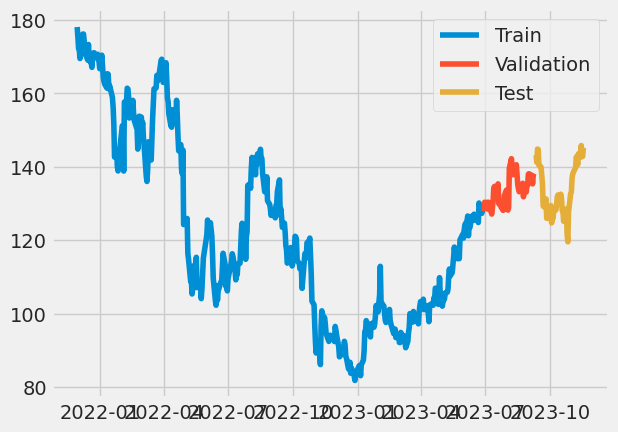

In [205]:
# In this test, we'll be using 10% for validaiton and 10% for test

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [206]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping

# This model was tested several times with different number of layers and neurons, try and test as you see fit

model = Sequential([layers.Input((5, 1)),
                    layers.LSTM(256),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(256, activation='relu'),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 256)               264192    
                                                                 
 dense_89 (Dense)            (None, 128)               32896     
                                                                 
 dense_90 (Dense)            (None, 256)               33024     
                                                                 
 dense_91 (Dense)            (None, 128)               32896     
                                                                 
 dense_92 (Dense)            (None, 1)                 129       
                                                                 
Total params: 363137 (1.39 MB)
Trainable params: 363137 (1.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [207]:
#HUGE epochs so we can make the training prediction get really close to the actual values, we use early_stopping to prevent overfitting and decrease error

early_stopping = EarlyStopping(monitor='val_loss', patience=60, restore_best_weights=True)


model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1000, callbacks=[early_stopping])

Epoch 1/1000
13/13 [==============================] - 4s 67ms/step - loss: 14734.8027 - mean_absolute_error: 118.6075 - val_loss: 14398.0674 - val_mean_absolute_error: 119.9271
Epoch 2/1000
13/13 [==============================] - 0s 15ms/step - loss: 7397.2842 - mean_absolute_error: 76.0966 - val_loss: 124.8508 - val_mean_absolute_error: 10.0393
Epoch 3/1000
13/13 [==============================] - 0s 14ms/step - loss: 1457.7772 - mean_absolute_error: 32.6443 - val_loss: 671.5859 - val_mean_absolute_error: 25.6021
Epoch 4/1000
13/13 [==============================] - 0s 12ms/step - loss: 863.4857 - mean_absolute_error: 23.1902 - val_loss: 39.1671 - val_mean_absolute_error: 5.0597
Epoch 5/1000
13/13 [==============================] - 0s 9ms/step - loss: 656.2633 - mean_absolute_error: 21.6293 - val_loss: 207.4171 - val_mean_absolute_error: 13.9330
Epoch 6/1000
13/13 [==============================] - 0s 9ms/step - loss: 470.0298 - mean_absolute_error: 18.1256 - val_loss: 105.7445 - val

13/13 [==============================] - 1s 5ms/step


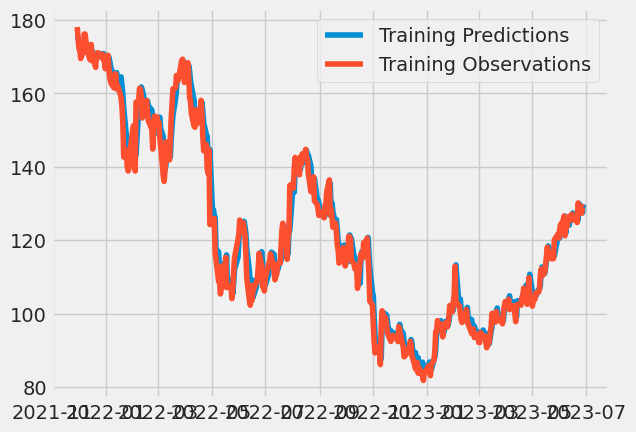

In [208]:
#This prediction over the train data is only for observation of how far the error accumulates through validation and test

train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 [==============================] - 0s 7ms/step


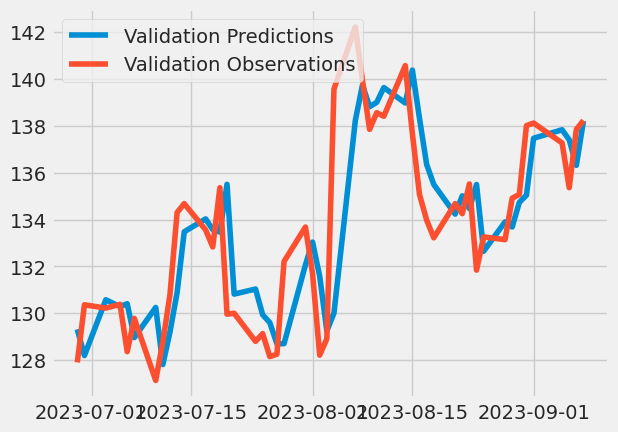

In [209]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 [==============================] - 0s 6ms/step


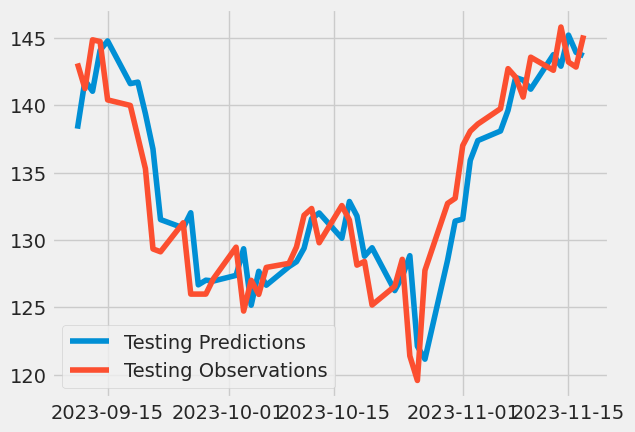

In [210]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [211]:
prediction = model.predict(X_val)


2/2 [==============================] - 0s 7ms/step


In [212]:
#Now, let's get absolute values of how far our model prediction is from the actual values of test (mean squared error)

import math
sum = 0

prediction = model.predict(X_test)

for index, values in enumerate(prediction):
  sum += (values[0] - y_test[index])**2

mse_teste = (sum)/(len(y_val))

print(math.sqrt(mse_teste))

2/2 [==============================] - 0s 7ms/step
3.0940609746738335


In [213]:
# Now for tomorrow's prediction: lets get the last 5 days
last_5_days = df.tail(5)

# Extract the "Close" column for the last 5 days
close_prices_last_5_days = last_5_days["Close"]

dadosHoje = [
    [close_prices_last_5_days[0]],
    [close_prices_last_5_days[1]],
    [close_prices_last_5_days[2]],
    [close_prices_last_5_days[3]],
    [close_prices_last_5_days[4]],
]

arrayTeste = np.array(dadosHoje, dtype=np.float32)

arrayTeste.shape

arrayTeste = arrayTeste.reshape((1, 5, 1))

predicaoAmanha = model.predict(arrayTeste)

print(f"Next day closing price prediction: $: {predicaoAmanha[0][0]}")

1/1 [==============================] - 0s 21ms/step
Next day closing price prediction: $: 145.61099243164062
